In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

# Ignore all warnings
warnings.filterwarnings("ignore")

In [99]:
train = pd.read_csv('Housing_dataset_train.csv')
test = pd.read_csv('Housing_dataset_test.csv')
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [101]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

<Axes: >

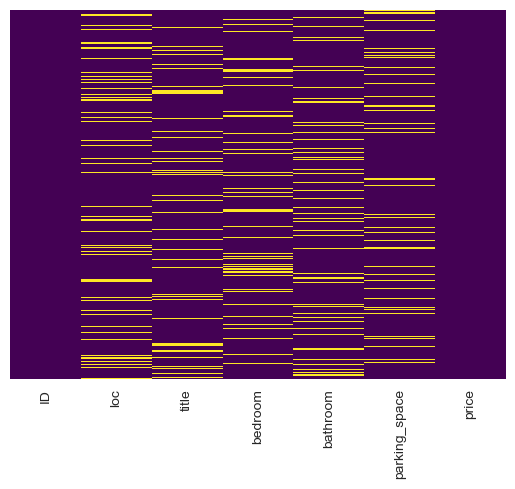

In [102]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #to visualize the missing data in the dataset

In [103]:
train['ind'] = 1
test['ind'] = 0

data_df = pd.concat([train, test]) # Concatenate train and test DataFrames

data_df # Output the combined DataFrame

,ID,loc,title,bedroom,bathroom,parking_space,price,ind
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,1
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814,1
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,1
...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0


In [104]:
data_df[['bathroom','bedroom','parking_space','price']].describe()

,bathroom,bedroom,parking_space,price
count,18195.000000,18201.000000,18189.000000,1.400000e+04
mean,3.124815,4.315312,3.157458,2.138082e+06
std,2.035028,2.445600,1.601164,1.083057e+06
min,1.000000,1.000000,1.000000,4.319673e+05
25%,1.000000,2.000000,2.000000,1.393990e+06
50%,2.000000,4.000000,3.000000,1.895223e+06
75%,5.000000,6.000000,4.000000,2.586699e+06
max,7.000000,9.000000,6.000000,1.656849e+07


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Semi-detached duplex'),
  Text(1, 0, 'Apartment'),
  Text(2, 0, 'Detached duplex'),
  Text(3, 0, 'Terrace duplex'),
  Text(4, 0, 'Mansion'),
  Text(5, 0, 'Bungalow'),
  Text(6, 0, 'Penthouse'),
  Text(7, 0, 'Townhouse'),
  Text(8, 0, 'Flat'),
  Text(9, 0, 'Cottage')])

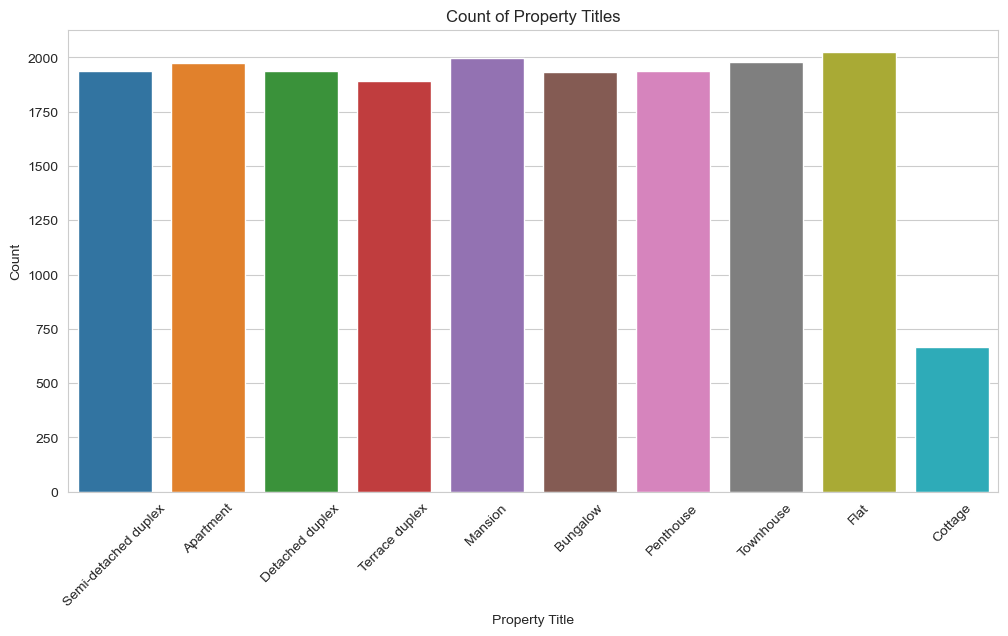

In [105]:
plt.figure(figsize=(12,6))
sns.countplot(x='title',data=data_df)
plt.xlabel('Property Title')
plt.ylabel('Count')
plt.title('Count of Property Titles')
plt.xticks(rotation=45)

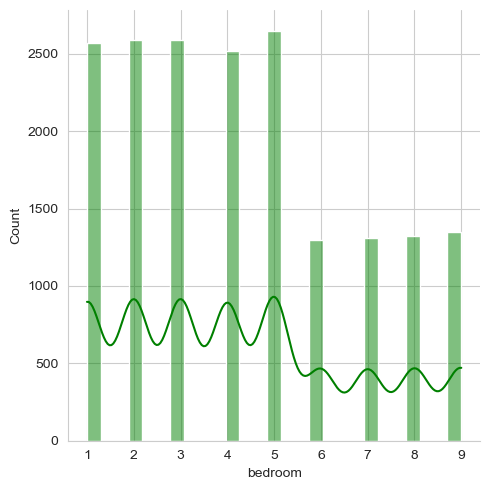

In [106]:
sns.set_style('whitegrid')
# Selected data
selected_data = data_df[['bedroom', 'bathroom', 'parking_space', 'price']]
sns.displot(selected_data['bedroom'].dropna(),kde=True,color='green')

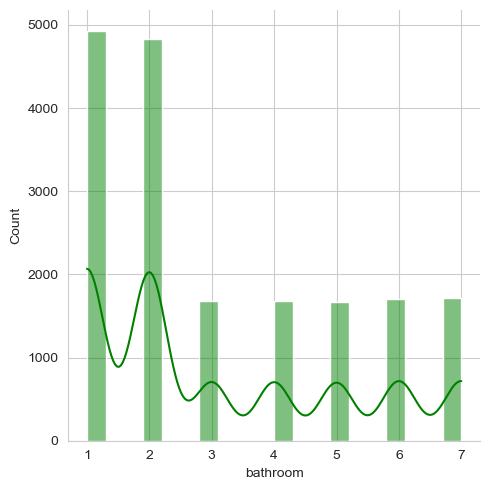

In [107]:
sns.displot(selected_data['bathroom'].dropna(),kde=True,color='green')

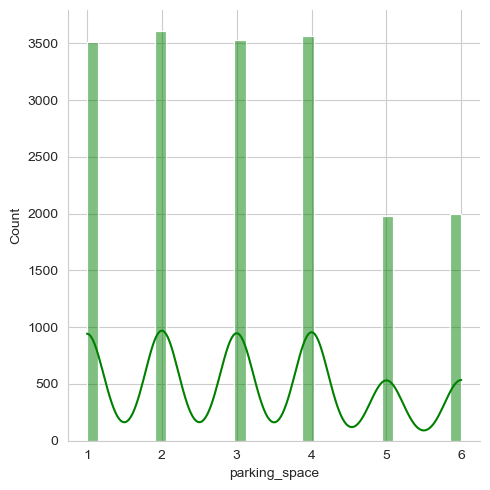

In [108]:
sns.displot(selected_data['parking_space'].dropna(),kde=True,color='green')

In [109]:
data_df[['loc','title']].describe()

,loc,title
count,18187,18278
unique,36,10
top,Anambra,Flat
freq,543,2026


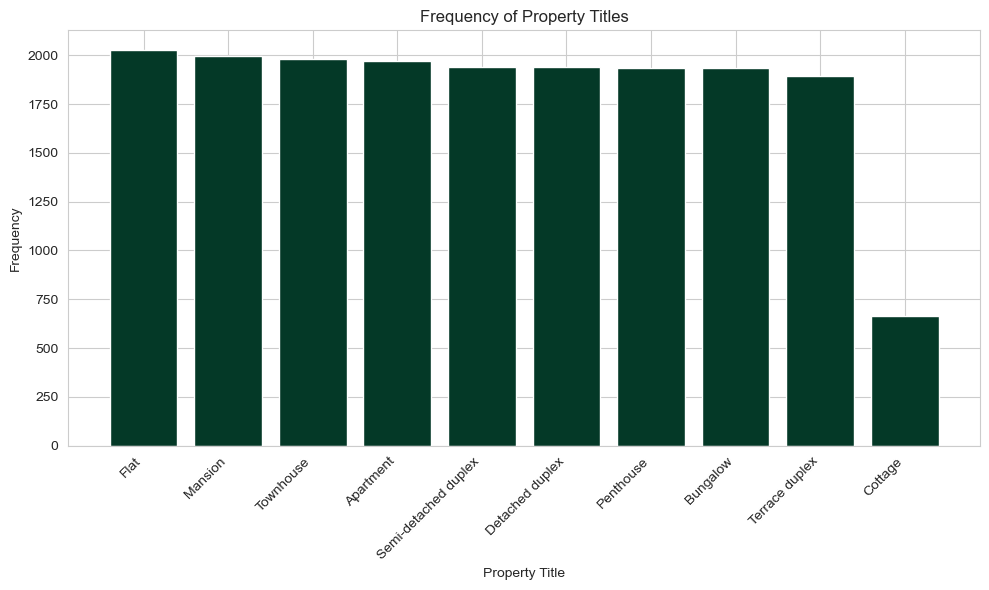

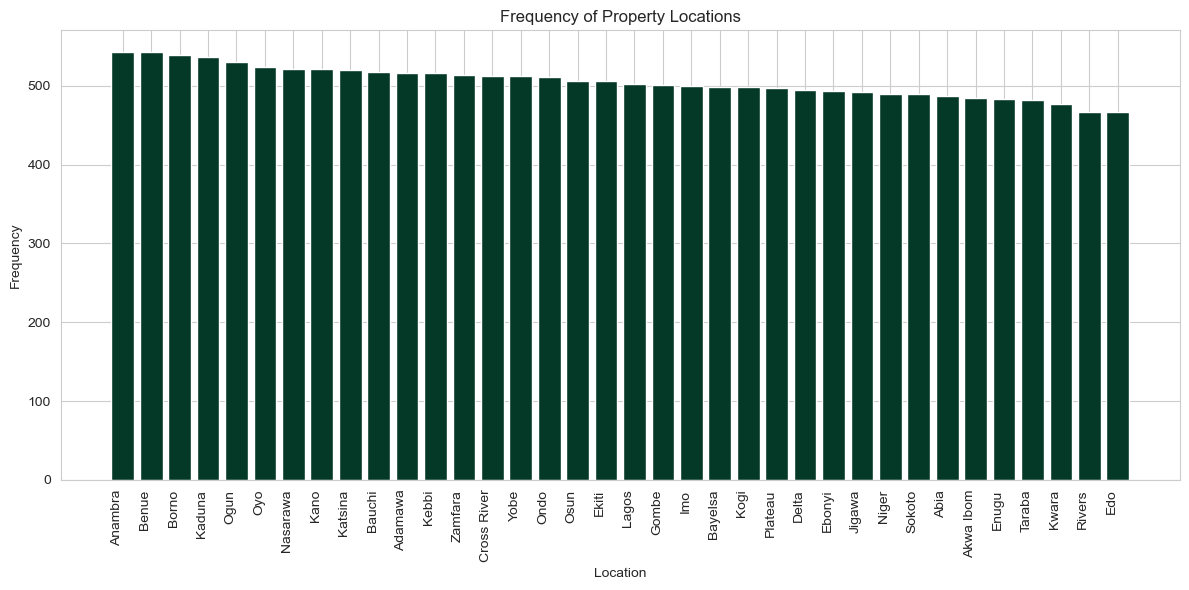

In [110]:
# Value counts of 'title' and 'loc' columns
title_counts = data_df['title'].value_counts()
loc_counts = data_df['loc'].value_counts()

# Plotting bar chart for 'title'
plt.figure(figsize=(10, 6))
plt.bar(title_counts.index, title_counts.values, color='#043927')
plt.xlabel('Property Title')
plt.ylabel('Frequency')
plt.title('Frequency of Property Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Plotting bar chart for 'loc'
plt.figure(figsize=(12, 6))
plt.bar(loc_counts.index, loc_counts.values, color='#043927')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Frequency of Property Locations')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap of Selected Features')

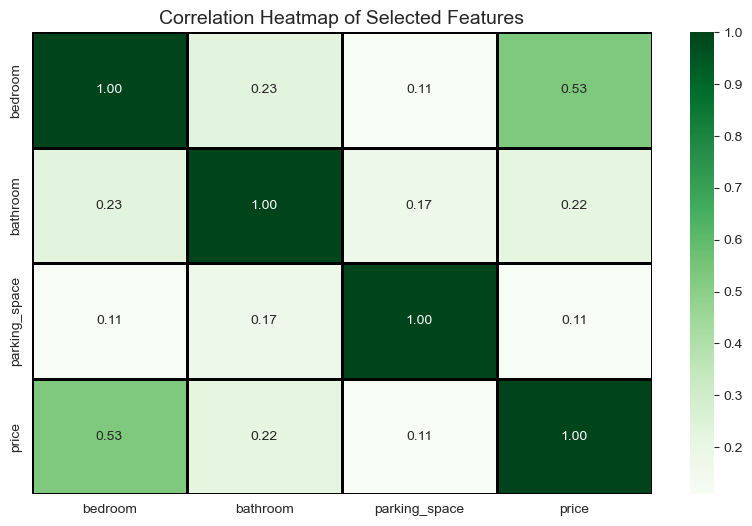

In [111]:
import matplotlib.colors as mcolors
# Select the relevant features for the correlation heatmap
selected_features = data_df[['bedroom', 'bathroom', 'parking_space', 'price']]

# Compute the correlation matrix
correlation_matrix = selected_features.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True,fmt='.2f',cmap="Greens", linewidths=1, linecolor='black')

# Add a title to the heatmap
plt.title('Correlation Heatmap of Selected Features', fontsize=14)

In [112]:
correlation_matrix

,bedroom,bathroom,parking_space,price
bedroom,1.000000,0.234478,0.109740,0.529145
bathroom,0.234478,1.000000,0.170285,0.221544
parking_space,0.109740,0.170285,1.000000,0.109211
price,0.529145,0.221544,0.109211,1.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Semi-detached duplex'),
  Text(1, 0, 'Apartment'),
  Text(2, 0, 'Detached duplex'),
  Text(3, 0, 'Terrace duplex'),
  Text(4, 0, 'Mansion'),
  Text(5, 0, 'Bungalow'),
  Text(6, 0, 'Penthouse'),
  Text(7, 0, 'Townhouse'),
  Text(8, 0, 'Flat'),
  Text(9, 0, 'Cottage')])

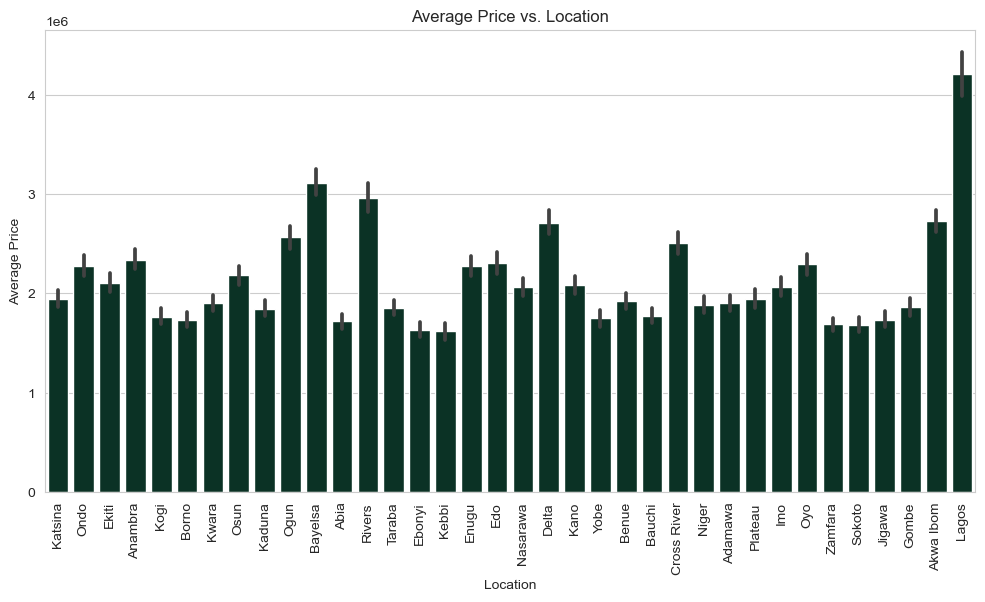

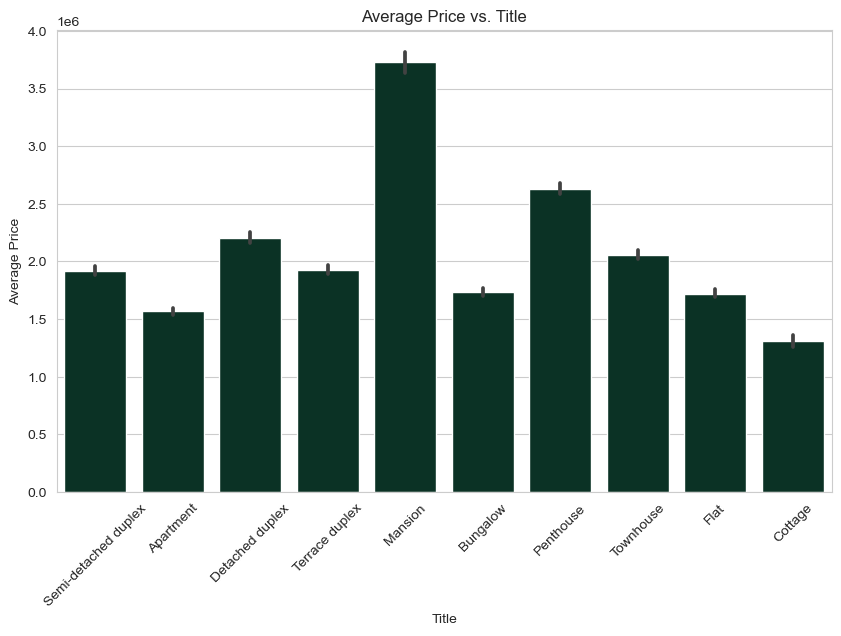

In [113]:
# Relationship between 'loc' and 'price'
plt.figure(figsize=(12, 6))
sns.barplot(x='loc', y='price', data=data_df, color ='#043927')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Average Price vs. Location')
plt.xticks(rotation=90)

# Relationship between 'title' and 'price'
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='price', data=data_df, color ='#043927')
plt.xlabel('Title')
plt.ylabel('Average Price')
plt.title('Average Price vs. Title')
plt.xticks(rotation=45)

In [114]:
data_df.dropna(subset=['loc','title'],inplace=True)
data_df

,ID,loc,title,bedroom,bathroom,parking_space,price,ind
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,1
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,1
5,1733,Borno,Mansion,NaN,1.0,3.0,1341750.867,1
...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0


In [115]:
data_df['bedroom'] = data_df['bedroom'].fillna(value=data_df['bedroom'].median())
data_df['bathroom'] = data_df['bathroom'].fillna(value=data_df['bathroom'].median())
data_df['parking_space'] = data_df['parking_space'].fillna(value=data_df['parking_space'].median())

In [116]:
data_df.isnull().sum()

ID                  0
loc                 0
title               0
bedroom             0
bathroom            0
parking_space       0
price            6000
ind                 0
dtype: int64

FEATURE ENGINEERING

In [117]:
data_df['comfort_ind'] = data_df['bedroom']/data_df['bathroom']
data_df['size'] = data_df['bedroom']+data_df['bathroom']+data_df['parking_space']
data_df['comfort_by_size'] = data_df['comfort_ind']*data_df['size']

In [118]:
import category_encoders as ce

#Converting the loc column (categorical variable) to numerical values
# Define the encoder instance
encoder = ce.TargetEncoder(cols=['loc'])

# Fit the encoder on the 'loc' column and 'price' target variable
encoder.fit(data_df['loc'], data_df['price'])

# Transform the 'loc' column with the encoded values
data_df['loc_encoded'] = encoder.transform(data_df['loc'])

data_df['loc_encoded'] = round((data_df['loc_encoded']/1000000),2)
# Drop the original 'loc' column if you no longer need it
data_df.drop('loc', axis=1, inplace=True)

# Print the updated DataFrame with the encoded 'loc' column
data_df

,ID,title,bedroom,bathroom,parking_space,price,ind,comfort_ind,size,comfort_by_size,loc_encoded
0,3583,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1,1.000000,5.0,5.000000,1.95
1,2748,Apartment,4.0,2.0,4.0,1672416.689,1,2.000000,10.0,20.000000,2.25
3,2224,Detached duplex,5.0,2.0,4.0,2410306.756,1,2.500000,11.0,27.500000,2.36
4,10300,Terrace duplex,4.0,5.0,6.0,2600700.898,1,0.800000,15.0,12.000000,1.76
5,1733,Mansion,4.0,1.0,3.0,1341750.867,1,4.000000,8.0,32.000000,1.71
...,...,...,...,...,...,...,...,...,...,...,...
5995,1594,Flat,4.0,5.0,2.0,NaN,0,0.800000,11.0,8.800000,2.11
5996,2416,Terrace duplex,5.0,7.0,1.0,NaN,0,0.714286,13.0,9.285714,1.88
5997,10195,Townhouse,4.0,1.0,4.0,NaN,0,4.000000,9.0,36.000000,2.29
5998,9455,Flat,3.0,7.0,5.0,NaN,0,0.428571,15.0,6.428571,1.75


In [119]:
#Ranking the title column by average price
# Calculate the average price for each title
title_average_price = data_df.groupby('title')['price'].mean()

# Create a new DataFrame to store the title and its corresponding average price
title_avg_price_df = pd.DataFrame({'title': title_average_price.index, 'avg_price': title_average_price.values})

# Sort the DataFrame by the average price in ascending order
title_avg_price_df.sort_values(by='avg_price', inplace=True)

# Create a new column 'title_rank' with the rank based on average price
title_avg_price_df['title_rank'] = range(1, len(title_avg_price_df) + 1)

# Merge the 'title_rank' column back to the original DataFrame based on 'title' column
data_df = pd.merge(data_df, title_avg_price_df[['title', 'title_rank']], on='title', how='left')

# Drop the 'title_rank' column if you no longer need it
data_df.drop('title', axis=1, inplace=True)

# Print the updated DataFrame with the 'title' column ranked by average price
data_df

,ID,bedroom,bathroom,parking_space,price,ind,comfort_ind,size,comfort_by_size,loc_encoded,title_rank
0,3583,2.0,2.0,1.0,1149999.565,1,1.000000,5.0,5.000000,1.95,5
1,2748,4.0,2.0,4.0,1672416.689,1,2.000000,10.0,20.000000,2.25,2
2,2224,5.0,2.0,4.0,2410306.756,1,2.500000,11.0,27.500000,2.36,8
3,10300,4.0,5.0,6.0,2600700.898,1,0.800000,15.0,12.000000,1.76,6
4,1733,4.0,1.0,3.0,1341750.867,1,4.000000,8.0,32.000000,1.71,10
...,...,...,...,...,...,...,...,...,...,...,...
16526,1594,4.0,5.0,2.0,NaN,0,0.800000,11.0,8.800000,2.11,3
16527,2416,5.0,7.0,1.0,NaN,0,0.714286,13.0,9.285714,1.88,6
16528,10195,4.0,1.0,4.0,NaN,0,4.000000,9.0,36.000000,2.29,7
16529,9455,3.0,7.0,5.0,NaN,0,0.428571,15.0,6.428571,1.75,3


MODELLING

In [120]:
train = data_df[data_df.ind == 1]
test = data_df[data_df.ind == 0]

train.drop('ind',axis=1,inplace=True)
test.drop(['ind','price'],axis=1,inplace=True)
train

,ID,bedroom,bathroom,parking_space,price,comfort_ind,size,comfort_by_size,loc_encoded,title_rank
0,3583,2.0,2.0,1.0,1149999.565,1.000000,5.0,5.000000,1.95,5
1,2748,4.0,2.0,4.0,1672416.689,2.000000,10.0,20.000000,2.25,2
2,2224,5.0,2.0,4.0,2410306.756,2.500000,11.0,27.500000,2.36,8
3,10300,4.0,5.0,6.0,2600700.898,0.800000,15.0,12.000000,1.76,6
4,1733,4.0,1.0,3.0,1341750.867,4.000000,8.0,32.000000,1.71,10
...,...,...,...,...,...,...,...,...,...,...
10526,10477,8.0,1.0,6.0,2837199.086,8.000000,15.0,120.000000,1.85,8
10527,6175,4.0,7.0,3.0,2367927.861,0.571429,14.0,8.000000,2.30,4
10528,9704,4.0,7.0,5.0,2228516.471,0.571429,16.0,9.142857,1.87,2
10529,11190,8.0,6.0,5.0,2406812.693,1.333333,19.0,25.333333,1.93,4


In [121]:
X = train.drop(['ID','price'],axis=1)
y = train['price']

In [122]:
from sklearn import metrics 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold

#splitting the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

rfc =  RandomForestRegressor(n_estimators=600)
rfc.fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)
print('Test set RMSE:', np.sqrt(metrics.mean_squared_error(y_test,rfc_pred)))

Test set RMSE: 408595.6919302773


XGBOOST MODEL

In [125]:
xgb_model = XGBRegressor()

# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = np.sqrt(-cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error'))

xgb_model.fit(X_train,y_train) #fit the model

# Convert the negative MSE scores to positive and take the square root to get RMSE
#cv_rmse_scores = (-cv_scores) ** 0.5

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())

# Evaluate the model on the test set
y_pred = xgb_model.predict(X_test)
print('Test set RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Cross-validation RMSE scores: [451181.04402118 530389.29429606 484741.22547423 624630.0001622
 400785.85758609]
Mean CV RMSE: 498345.48430795164
Test set RMSE: 428290.2580072748


In [124]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# Assuming you have the features in X and the target variable in y

# Define the CatBoost model
model = CatBoostRegressor(loss_function='RMSE', random_seed=42,silent=True)

# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate RMSE
rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error'))

# Train the model on the entire dataset
model.fit(X, y)

# Print the cross-validation RMSE scores
print('Cross-Validation RMSE:', rmse_scores)
print('CV Mean RMSE:',rmse_scores.mean())

Cross-Validation RMSE: [416074.45850279 457292.36576602 388393.39530052 425589.51796058
 391693.29850137]
CV Mean RMSE: 415808.6072062544


Text(0.5, 1.0, 'Feature Importance')

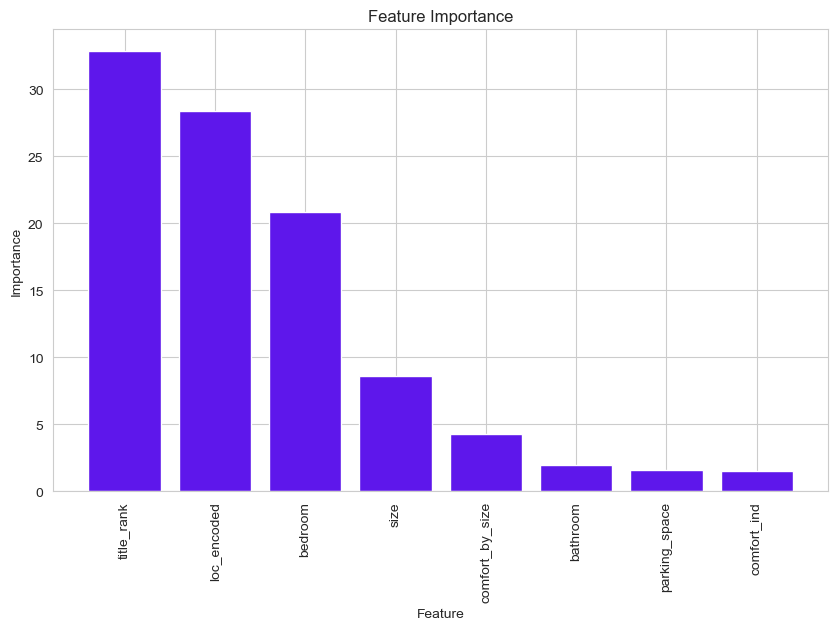

In [126]:
import matplotlib.pyplot as plt
feature_importance = model.get_feature_importance()

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store the feature importance scores with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'],color='#5e17eb')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')


In [127]:
X_test = test.drop(['ID'], axis=1)

# Use the trained model to predict prices for the test dataset
y_pred = model.predict(X_test)

# Reshape the predicted values to be a 1-dimensional array
y_pred = y_pred.reshape(-1)

# Create a DataFrame with ID and predicted price columns
predictions_df = pd.DataFrame({'ID': test['ID'], 'price': y_pred})

# Display the predictions DataFrame
predictions_df

,ID,price
10531,845,2.404969e+06
10532,1924,1.052508e+06
10533,10718,1.270890e+06
10534,12076,8.762322e+06
10535,12254,1.945779e+06
...,...,...
16526,1594,1.867326e+06
16527,2416,2.002983e+06
16528,10195,1.973238e+06
16529,9455,1.378147e+06


In [128]:
predictions_df.to_csv('submission.csv', index=False)